<a href="https://colab.research.google.com/github/ckraju/kvasu/blob/master/currency.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving normnovdecjantrain.csv to normnovdecjantrain.csv


In [0]:
import pandas as pd


In [0]:
import io

df2 = pd.read_csv(io.BytesIO(uploaded['normnovdecjantrain.csv']))

# Dataset is now stored in a Pandas Dataframe

In [5]:
# Visualize training history
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import numpy
from keras.utils import to_categorical

Using TensorFlow backend.


In [0]:
# fix random seed for reproducibility
seed = 23
numpy.random.seed(seed)
# load pima indians dataset
dataset = numpy.loadtxt("normnovdecjantrain.csv", delimiter=",")
# split into input (X) and output (Y) variables
X = dataset[:,0:24]
Y = dataset[:,24]

In [7]:
X

array([[0.98259583, 1.00805291, 1.00773965, ..., 0.98284546, 1.01931284,
        0.97635877],
       [0.97837311, 1.00254739, 1.01021477, ..., 0.98001088, 1.01962014,
        0.98005769],
       [0.98517797, 1.00317917, 1.00838135, ..., 0.97801831, 1.014857  ,
        0.98409787],
       ...,
       [1.00336706, 0.99352193, 0.99719749, ..., 1.01703821, 0.98535623,
        1.01071683],
       [1.00368091, 0.99460499, 0.9996726 , ..., 1.02078801, 0.98489528,
        1.0086472 ],
       [1.00276789, 0.99361219, 1.00022263, ..., 1.022995  , 0.98781463,
        1.01016639]])

In [8]:
Y

array([0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [0]:
# create model
model = Sequential()
model.add(Dense(24, input_dim=24, kernel_initializer='uniform', activation='relu'))
model.add(Dense(24, kernel_initializer='uniform', activation='relu'))
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))

In [12]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
history = model.fit(X, Y, validation_split=0.33, epochs=150, batch_size=10)
# list all data in history
print(history.history.keys())




Train on 32 samples, validate on 17 samples
Epoch 1/150





32/32 [==============================] - 1s 25ms/step - loss: 0.6928 - acc: 0.6563 - val_loss: 0.6947 - val_acc: 0.2353
Epoch 2/150
32/32 [==============================] - 0s 390us/step - loss: 0.6922 - acc: 0.6562 - val_loss: 0.6951 - val_acc: 0.2353
Epoch 3/150
32/32 [==============================] - 0s 496us/step - loss: 0.6920 - acc: 0.6562 - val_loss: 0.6955 - val_acc: 0.2353
Epoch 4/150
32/32 [==============================] - 0s 476us/step - loss: 0.6917 - acc: 0.6562 - val_loss: 0.6962 - val_acc: 0.2353
Epoch 5/150
32/32 [==============================] - 0s 478us/step - loss: 0.6914 - acc: 0.6562 - val_loss: 0.6972 - val_acc: 0.2353
Epoch 6/150
32/32 [==============================] - 0s 611us/step - loss: 0.6907 - acc: 0.6562 - val_loss: 0.6979 - val_acc: 0.2353
Epoch 7/150
32/32 [==============================] - 0s 547us/step - loss: 0.6902 - acc: 0.6562 - val_loss: 0.6990 - val_acc: 0.2353
Epoch 8/150
32/32 

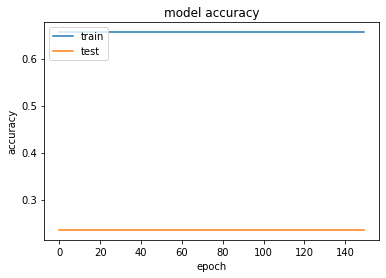

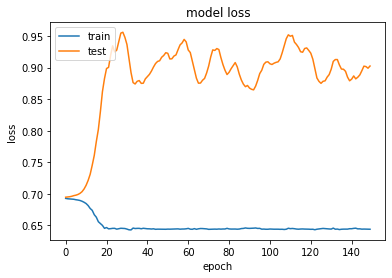

In [13]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()